In [1]:
# Facebook data mining bootcamp !!!

# Modified and Added to by Max Nadeau

# important imports 
import os
import json
import numpy as np
import pylab as pl
import datetime
from datetime import datetime


In [2]:
# globals 

CURRENT_DIRECTORY = os.getcwd() 
NUMBER_TO_ANALYZE = 700
MESSAGE_THRESHOLD = 50
MESSAGE_BOUND = 100000


In [3]:
# get json data for the individual chats in your messages folder 

def get_json_data(chat):
    try:
        # you may need to change the directory path, depends on where you've downloaded your fb messages to. 
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)


    
# create new globals for data to be plotted 
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0



print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')


Analyzing 7 chats...


In [4]:
# sort data into new gobals 

for chat in chats:
    url = chat
    json_data = get_json_data(chat)

    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Finished processing chats...


In [5]:
# continue sorting messages into the new globals (dictionaries)
# you may have to alter this code a bit depending on what functions you would like to add


for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.utcfromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

    

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 3492 messages - Catappreciationchat_89e0d454d9
1 - 497 messages - Indoorsoccer_ea14b34757
2 - 121 messages - michaelwernig_1089dcbaf3
3 - 108 messages - kaialangathianos_95580a3269
4 - 53 messages - adamdonnelly_8f40ea0790
Found 1 invalid messages...
Found 5 chats with 50 messages or more


In [128]:
people = []
for message in messages:
    name = message.get('sender_name')
    if name not in people:
        people = people + [name]
people = {person:{"exps": 0, "total": 0, "egotism": 0} for person in people}

In [129]:
for message in messages:
    text = message.get('content')
    people[message['sender_name']]['total'] = people[message['sender_name']]['total'] + 1
    if text != None:
        text = text.lower()
        if message['sender_name'] == 'Tyler Hanf':
            print(message.get('sender_name') + ": " + message.get('content'))
        if '!' in text:
            
            people[message['sender_name']]['exps'] = people[message['sender_name']]['exps'] + text.count('!')
        if 'i ' in text or 'my ' in text  or "i'm " in text or ' me ' in text:
            
            people[message['sender_name']]['egotism'] = people[message['sender_name']]['egotism'] + text.count('i ') + text.count('my ')+ text.count("i'm ") + text.count(' me ')
    
        
        
        

Tyler Hanf: Psshht please, is that even a question? Yeah man I'm definitely going! It's gonna be sweet!
Tyler Hanf: Haha what are you talking about?
Tyler Hanf: Yeah! Great memories! And motivation!
Tyler Hanf: What a picture! I like it!
Tyler Hanf: Yeah 10 sounds good plus we will still get a decent amount of playing time no matter what


In [130]:
people

{'Michael Wernig': {'exps': 14, 'total': 362, 'egotism': 101},
 'Madelyn Griffeth': {'exps': 12, 'total': 1038, 'egotism': 271},
 'Shannon Anderson': {'exps': 3, 'total': 769, 'egotism': 220},
 'Cordelia Penney': {'exps': 0, 'total': 205, 'egotism': 55},
 'Jack Henry Bosies': {'exps': 13, 'total': 612, 'egotism': 177},
 'Cody Hodgins': {'exps': 5, 'total': 23, 'egotism': 6},
 'Sean Desautelle': {'exps': 6, 'total': 276, 'egotism': 99},
 'Connor Leggett': {'exps': 23, 'total': 375, 'egotism': 141},
 'Hayley Graton': {'exps': 0, 'total': 5, 'egotism': 0},
 'Leon Iser': {'exps': 0, 'total': 12, 'egotism': 8},
 'Sandor Gamache': {'exps': 0, 'total': 47, 'egotism': 26},
 'Adam Donnelly': {'exps': 13, 'total': 206, 'egotism': 46},
 'Alden Blais': {'exps': 1, 'total': 66, 'egotism': 13},
 'Shea Therrien': {'exps': 0, 'total': 32, 'egotism': 3},
 'Owen Ramsey': {'exps': 0, 'total': 23, 'egotism': 9},
 'Nolan Dwyer': {'exps': 0, 'total': 5, 'egotism': 3},
 'Branden Lemay': {'exps': 0, 'total': 

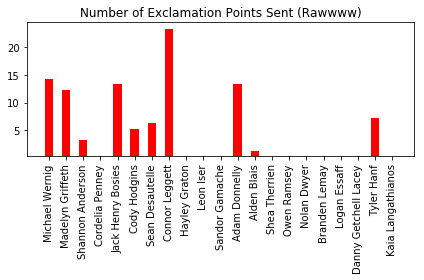

In [131]:
names = [person for person in people]
exps = [people[person]['exps'] for person in people]
totals = [people[person]['total'] for person in people]
egos = [people[person]['egotism'] for person in people]

X = np.arange(len(names))
pl.bar(X, exps, align='center', width=0.5, color = 'r', bottom = 0.3)
pl.xticks(X, names, rotation = 90)
pl.title('Number of Exclamation Points Sent (Rawwww)')
pl.tight_layout()
pl.show()

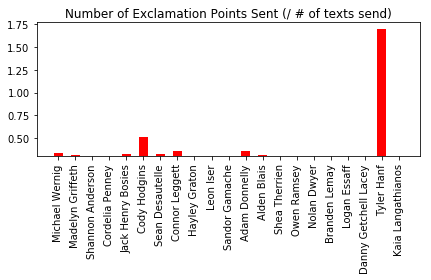

In [132]:
X = np.arange(len(names))
pl.bar(X, [exp / total for exp, total in zip(exps, totals)], align='center', width=0.5, color = 'r', bottom = 0.3)
pl.xticks(X, names, rotation = 90)
pl.title('Number of Exclamation Points Sent (/ # of texts send)')
pl.tight_layout()
pl.show()

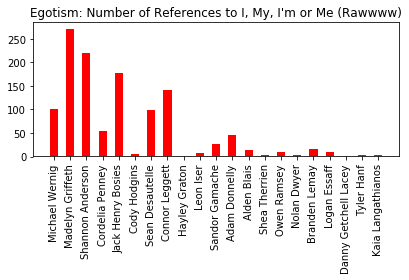

In [133]:
X = np.arange(len(names))
pl.bar(X, egos, align='center', width=0.5, color = 'r', bottom = 0.3)
pl.xticks(X, names, rotation = 90)
pl.title("Egotism: Number of References to I, My, I'm or Me (Rawwww)")
pl.tight_layout()
pl.show()

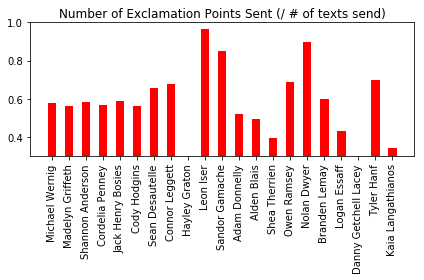

In [139]:
X = np.arange(len(names))
ego_ratios = [ego / total for ego, total in zip(egos, totals)]

pl.bar(X, ego_ratios, align='center', width=0.5, color = 'r', bottom = 0.3)
pl.xticks(X, names, rotation = 90)
pl.title('Number of Exclamation Points Sent (/ # of texts send)')
pl.tight_layout()
pl.show()

In [ ]:
# plotting functions


def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = []
        for time in person_to_times[person]:
            plotted_data.append(time)
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

    
def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    #plot_num_messages(chat_number)
    #plot_histogram_time(chat_number)
    #plot_histogram_words(chat_number)



plot(0)
#plot(29)

KeyboardInterrupt: 